In [1]:
#!pip install selenium
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import requests
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
import json
from collections import defaultdict
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
from selenium.webdriver.common.by import By

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time

PATH = '/chromedriver_mac_arm64/chromedriver'


l=list()
o={}

target_url = "https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=true"

driver=webdriver.Chrome(PATH)

driver.get(target_url)

driver.maximize_window()
time.sleep(2)

resp = driver.page_source

driver.find_element_by_xpath("M13.34 12l5.38-5.38a.95.95 0 00-1.34-1.34L12 10.66 6.62 5.28a.95.95 0 00-1.34 1.34L10.66 12l-5.38 5.38a.95.95 0 001.34 1.34L12 13.34l5.38 5.38a.95.95 0 001.34-1.34z").click()
#driver.close()
driver.find_

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=true")

    # Get element with tag name 'div'
element = driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()

driver.maximize_window()

In [ ]:
driver = webdriver.Chrome()
# driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=false")
driver.get("https://www.glassdoor.com/Job/us-data-scientist-jobs-SRCH_IL.0,2_IN1_KO3,17.htm?clickSource=searchBox")
jobs = []
num_jobs = 900
verbose = True
while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(4)

        #Test for the "Sign Up" prompt and get rid of it.
#         try:
#             driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()
#         except ElementClickInterceptedException:
#             pass

#         time.sleep(.1)

        try:
            driver.find_element(By.CSS_SELECTOR, '[class="SVGInline modal_closeIcon"]').click()  #clicking to the X.
        except NoSuchElementException:
            pass

        
        #Going through each job in this page
        job_buttons = driver.find_elements(By.CSS_SELECTOR, '[data-test="jobListing"]')  #jl for Job Listing. These are the buttons we're going to click.
        
              
        for job_button in job_buttons:  
            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            
            if len(jobs) >= num_jobs:
                break
                
            try:
                if driver.find_element(By.CSS_SELECTOR, '[alt="Close"]'):
                    time.sleep(3)
                    driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
            except NoSuchElementException:
                pass
            
#             job_button.click()
            
            try:
                job_button.click()
            except NoSuchElementException:
                print(job_button.text)

      
            try:
                if driver.find_element(By.CSS_SELECTOR, '[alt="Close"]'):
                    time.sleep(3)
                    driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
            except NoSuchElementException:
                pass

            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    if driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]'):
                        company_name = driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]').text
                    else:
                        try:
                            company_name = driver.find_element(By.CSS_SELECTOR, '[class="d-flex justify-content-between"]').text
                        except:
                            NoSuchElementException
                    location = driver.find_element(By.CSS_SELECTOR, '[data-test="location"]').text
                    job_title = driver.find_element(By.CSS_SELECTOR, '[class="css-1vg6q84 e1tk4kwz4"]').text
                    job_description = driver.find_element(By.CSS_SELECTOR, '[class="jobDescriptionContent desc"]').text
                    # salary_estimate = driver.find_element(By.CSS_SELECTOR, '[class="css-1xe2xww e1wijj242"]').text
                    collected_successfully = True
#                     if len(job_title)<1:
#                         time.sleep(5)
#                         job_title = driver.find_element(By.CSS_SELECTOR, '[data-test="jobTitle"]').text
                except:
                    time.sleep(5)
                    
                    
            # class="d-flex justify-content-between"

            try:
#                 salary_element = WebDriverWait(driver, 10).until(
#                                     EC.presence_of_element_located((By.CSS_SELECTOR, "[class='css-1bluz6i e2u4hf13']")))
                salary_estimate = driver.find_element(By.CSS_SELECTOR, '[class="css-1bluz6i e2u4hf13"]').get_attribute("textContent")
#                 salary_estimate = salary_element.text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element(By.CSS_SELECTOR, '[data-test="detailRating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            
            #try:
            overview_name = driver.find_elements(By.CSS_SELECTOR, '[class="css-1taruhi e1pvx6aw1"]')
            overview_name_list = [element.text for element in overview_name]
            overview = driver.find_elements(By.CSS_SELECTOR, '[class="css-i9gxme e1pvx6aw2"]')
            overview_list = [element.text for element in overview]
#             for name, value in zip(overview_name_list, overview_list):
            if "Size" in overview_name_list:
                size = overview_list[overview_name_list.index("Size")]
            else:
                size = -1

            if "Founded" in overview_name_list:
                founded = overview_list[overview_name_list.index("Founded")]
            else:
                founded = -1

            if "Type" in overview_name_list:
                type_of_ownership = overview_list[overview_name_list.index("Type")]
            else:
                type_of_ownership = -1

            if "Industry" in overview_name_list:
                industry = overview_list[overview_name_list.index("Industry")]
            else:
                industry = -1

            if "Sector" in overview_name_list:
                sector = overview_list[overview_name_list.index("Sector")]
            else:
                sector = -1

            if "Revenue" in overview_name_list:
                revenue = overview_list[overview_name_list.index("Revenue")]
            else:
                revenue = -1

#                     founded = overview[1].text
#                     type_of_ownership = overview[2].text
#                     industry = overview[3].text
#                     sector = overview[4].text
#                     revenue = overview[5].text
#                 else:# NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
#                     headquarters = -1
#                     size = -1
#                     founded = -1
#                     type_of_ownership = -1
#                     industry = -1
#                     sector = -1
#                     revenue = -1

                
            if verbose:
                # print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                # print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            #"Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element(By.CSS_SELECTOR, '[aria-label="Next"]').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

In [ ]:
first_scrape = jobs
first_scrape

In [ ]:
import pandas as pd
stored_dataframe = pd.read_csv('glassdoor_ds_job_salary.csv')

In [ ]:
newly_scraped = pd.DataFrame(first_scrape)

In [ ]:

new_df = pd.concat([stored_dataframe, newly_scraped], axis=0)


In [ ]:
new_df.drop_duplicates()

In [ ]:
updated_scraped = new_df.drop_duplicates()

In [ ]:
updated_scraped.to_csv('glassdoor_ds_job_salary.csv', index=False)

In [ ]:
stored_dataframe

In [ ]:
second_scrape = jobs
second_scrape

In [ ]:
combined_first_second = first_scrape + second_scrape + third_scrape + success_list
len(combined_first_second)

In [ ]:
third_scrape = jobs
len(third_scrape)

In [ ]:
import json
unique_values = set(json.dumps(d) for d in success_list)

print(len(unique_values))
unique_values

In [ ]:
success_list = jobs
len(success_list)
success_set = set(json.dumps(d) for d in success_list)
len(success_set)

In [ ]:
from collections import defaultdict
def frequencies(lst):
    freq = defaultdict(int)
    for val in lst:
        freq[val] += 1
    return dict(freq)



In [ ]:
list = [1, 2, 3]
frequencies(list)

In [ ]:
success_lst = [json.dumps(d) for d in success_list]

In [ ]:
successs_dict = frequencies(success_lst)

In [ ]:
type(successs_dict)

In [ ]:
for key, value in successs_dict.items():
    print(value)

In [ ]:
successs_dict

In [ ]:
success_lst = [json.dumps(d) for d in success_list]
print(len(success_lst)
print(frequencies(success_lst))

In [ ]:
first_scrape.extend(second_scrape)

In [ ]:
response = requests.get(target_url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")
soup = BeautifulSoup(response.content, 'html.parser')
allJobsContainer = soup.find("ul")

#allJobs = allJobsContainer.find_all("li")

In [ ]:
response.status_code

In [ ]:
allJobsContainer

In [ ]:
driver = webdriver.Chrome()
driver.get("https://www.glassdoor.com/Job/united-states-data-scientist-jobs-SRCH_IL.0,13_IN1_KO14,28_IP7.htm?includeNoSalaryJobs=false")

    # Get element with tag name 'div'
element = driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()
job_buttons = driver.find_elements(By.CSS_SELECTOR, '[data-test="jobListing"]')  #jl for Job Listing. These are the buttons we're going to click.
for job_button in job_buttons: 
    try:
        driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
    except NoSuchElementException:
        pass
    job_button.click()
    try:
        driver.find_element(By.CSS_SELECTOR, '[alt="Close"]').click()  #clicking to the X.
    except NoSuchElementException:
        pass

            
# collected_successfully = False

# while not collected_successfully:
#     try:
#         company_name = driver.find_element(By.CSS_SELECTOR, '[data-test="employerName"]').text
#         location = driver.find_element(By.CSS_SELECTOR, '[data-test="location"]').text
#         job_title = driver.find_element(By.CSS_SELECTOR, '[data-test="job-link"]').text
#         job_description = driver.find_element(By.CSS_SELECTOR, '[class="jobDescriptionContent desc"]').text
#         collected_successfully = True
#     except:
#         time.sleep(5)
                    
#     try:
#         salary_estimate = driver.find_element(By.CSS_SELECTOR, '[data-test="detailSalary"]').text
#     except NoSuchElementException:
#         salary_estimate = -1 #You need to set a "not found value. It's important."

#     try:
#         rating = driver.find_element(By.CSS_SELECTOR, '[data-test="detailRating"]').text
#     except NoSuchElementException:
#         rating = -1 #You need to set a "not found value. It's important."
        
# overview = driver.find_elements(By.CSS_SELECTOR, '[class="css-i9gxme e1pvx6aw2"]')
# #for each in overview:
# size = overview[0].text
# founded = overview[1].text
# type_of_ownership = overview[2].text
# industry = overview[3].text
# sector = overview[4].text
# revenue = overview[5].text
    #print(each.text)
driver.maximize_window()


In [ ]:
company_name

In [ ]:
location

In [ ]:
job_title

In [ ]:
job_description

In [ ]:
salary_estimate

In [ ]:
rating

In [ ]:
size

In [ ]:
founded

In [ ]:
type_of_ownership

In [ ]:
industry

In [ ]:
sector

In [ ]:
revenue

In [ ]:
job_buttons

In [ ]:
type(job_title)

In [ ]:
import pandas as pd
df = pd.DataFrame(combined_first_second)
df

In [ ]:
df_no_dup = df.drop_duplicates()

In [ ]:
df_no_dup.to_csv('glassdoor_ds_job_salary.csv', index=False)

In [ ]:
newly_scraped

After webscraping the data, we put it into a csv file.


<h1>DATA CLEANING SECTION</h1>

In [4]:
import pandas as pd

In [116]:
df = pd.read_csv('glassdoor_ds_job_salary.csv')

In [6]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Designer UIX NLP/NLU,"$117,500 /yr (est.)",* W2 Only *\nThe successful candidate will pro...,-1.0,"RightFit Talent Brokers, LLC",Remote,-1,-1,-1,-1,-1,-1
1,Machine Learning Engineer,"$129,337 /yr (est.)",Signal Systems Corporation (SSC) is searching ...,-1.0,Signal Systems Corporation,"Millersville, MD",-1,-1,-1,-1,-1,-1
2,Senior Algorithms & Machine Learning Scientist,"$129,163 /yr (est.)","Job Summary:\n\nWalgreens, one of the nation's...",3.1,WALGREENS\n3.1,"Chicago, IL",10000+ Employees,1901,Company - Public,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
3,Data Scientist with AI and ML experience,"$140,000 /yr (est.)",Data Scientist with advanced analytics experie...,-1.0,"innoVet Health, LLC",Remote,-1,-1,-1,-1,-1,-1
4,Machine Learning Engineer,"$112,751 /yr (est.)",Supports and performs the development and prog...,3.7,Vanguard\n3.7,"Philadelphia, PA",10000+ Employees,1975,Company - Private,Investment & Asset Management,Financial Services,Unknown / Non-Applicable


In [7]:
df['Type of ownership'].value_counts()

Company - Private                 591
Company - Public                  358
-1                                211
Nonprofit Organization             60
Subsidiary or Business Segment     40
College / University               34
Contract                           25
Unknown                            19
Government                         18
Hospital                           11
Self-employed                      11
School / School District            8
Private Practice / Firm             2
Franchise                           1
Name: Type of ownership, dtype: int64

In [8]:
df['Founded'].value_counts()

-1       543
 1999     25
 1981     23
 2013     18
 2003     18
        ... 
 1919      1
 1740      1
 1817      1
 1806      1
 1845      1
Name: Founded, Length: 165, dtype: int64

In [9]:
#The column Type of ownership and Founded do not seem to be so acurated and useful, so we'll remove it
df.drop(['Type of ownership', 'Founded'], axis=1, inplace=True)

In [10]:
#we first check for duplicates
print(f"There are {df.duplicated().sum()} duplicates")

# remove duplicates
df.drop_duplicates(inplace=True)

There are 112 duplicates


In [11]:
# check for missing values
df.isna().sum()

Job Title           0
Salary Estimate     0
Job Description     0
Rating              0
Company Name        0
Location           15
Size                0
Industry            0
Sector              0
Revenue             0
dtype: int64

We are now going to handle the most important part of hour dataset: salary estimate

In [12]:
#remove all rows that have a missing estimated salary. We need labeled examples in order to build our model!

# We first Count the number of rows with -1 as salary estimate (which means it is missing)
count = df[df['Salary Estimate'] == '-1'].shape[0]
print(f'There are {count} rows with a missing salary estimate')

#remove those rows
df = df[df['Salary Estimate'] != '-1']

There are 205 rows with a missing salary estimate


In [13]:
import re

#Let's check if all the salaries have the same format. For example: $131,400 /yr (est.)


# Define regular expression pattern to check format
pattern = r'\$\d{1,3}(,\d{3})*\s?\/yr\s?\(est.\)'

# Check if all values in the Salary Estimate column have the expected format
matches = df['Salary Estimate'].apply(lambda x: bool(re.match(pattern, x)))

not_matching = df[~matches]
print(f'Number of Values in the Salary Estimate column have do not have the expected format: {len(not_matching)}')
#not_matching

Number of Values in the Salary Estimate column have do not have the expected format: 162


In [14]:
# We realize that some salaries are expressed at a hourly rate, instead of a yearly rate.


# Identify rows with hourly salary values
hourly_mask = df['Salary Estimate'].str.contains('/hr')

# Convert hourly salary values to yearly salary values
df.loc[hourly_mask, 'Salary Estimate'] = df.loc[hourly_mask, 'Salary Estimate'].apply(lambda x: str(float(x[1:x.index('/')].replace(',', '')) * 2080) + ' /yr (est.)')


# Remove any non-numeric characters and convert to numeric
df['Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[^0-9]', '', x))

df['Salary Estimate'] = pd.to_numeric(df['Salary Estimate'])

#We now have in our salary estimate column yearly salaries expressed as integers


In [15]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
0,Designer UIX NLP/NLU,117500,* W2 Only *\nThe successful candidate will pro...,-1.0,"RightFit Talent Brokers, LLC",Remote,-1,-1,-1,-1
1,Machine Learning Engineer,129337,Signal Systems Corporation (SSC) is searching ...,-1.0,Signal Systems Corporation,"Millersville, MD",-1,-1,-1,-1
2,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary:\n\nWalgreens, one of the nation's...",3.1,WALGREENS\n3.1,"Chicago, IL",10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
3,Data Scientist with AI and ML experience,140000,Data Scientist with advanced analytics experie...,-1.0,"innoVet Health, LLC",Remote,-1,-1,-1,-1
4,Machine Learning Engineer,112751,Supports and performs the development and prog...,3.7,Vanguard\n3.7,"Philadelphia, PA",10000+ Employees,Investment & Asset Management,Financial Services,Unknown / Non-Applicable


In [16]:
#cleaning a little bit the job description
df['Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ' '))
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
0,Designer UIX NLP/NLU,117500,* W2 Only * The successful candidate will prov...,-1.0,"RightFit Talent Brokers, LLC",Remote,-1,-1,-1,-1
1,Machine Learning Engineer,129337,Signal Systems Corporation (SSC) is searching ...,-1.0,Signal Systems Corporation,"Millersville, MD",-1,-1,-1,-1
2,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary: Walgreens, one of the nation's l...",3.1,WALGREENS\n3.1,"Chicago, IL",10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
3,Data Scientist with AI and ML experience,140000,Data Scientist with advanced analytics experie...,-1.0,"innoVet Health, LLC",Remote,-1,-1,-1,-1
4,Machine Learning Engineer,112751,Supports and performs the development and prog...,3.7,Vanguard\n3.7,"Philadelphia, PA",10000+ Employees,Investment & Asset Management,Financial Services,Unknown / Non-Applicable


In [17]:
print(df.dtypes)

Job Title           object
Salary Estimate      int64
Job Description     object
Rating             float64
Company Name        object
Location            object
Size                object
Industry            object
Sector              object
Revenue             object
dtype: object


In [18]:
#check null values in the whole database
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072 entries, 0 to 1388
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        1072 non-null   object 
 1   Salary Estimate  1072 non-null   int64  
 2   Job Description  1072 non-null   object 
 3   Rating           1072 non-null   float64
 4   Company Name     1072 non-null   object 
 5   Location         1058 non-null   object 
 6   Size             1072 non-null   object 
 7   Industry         1072 non-null   object 
 8   Sector           1072 non-null   object 
 9   Revenue          1072 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 92.1+ KB


In [19]:
rows_with_null = df[df.isnull().any(axis=1)]
print(f"Len:{len(rows_with_null)}")
rows_with_null.head()

Len:14


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
52,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary: Walgreens, one of the nation's l...",3.1,WALGREENS\n3.1,NaN,10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
64,"PhD Director, Data Science R&D (Decision Scien...",105882,"Job Description In this role, you will assume...",3.9,Epsilon\n3.9,NaN,5001 to 10000 Employees,Advertising & Public Relations,Media & Communication,$1 to $5 billion (USD)
74,"Sr Manager, Data Science",120353,"At HCSC, we consider our employees the corners...",4.0,HCSC\n4.0,NaN,10000+ Employees,Insurance Carriers,Insurance,Unknown / Non-Applicable
93,Data Scientist - Supply Planning,100638,Beam Suntory is Crafting the Spirits that Stir...,3.9,Beam Inc.\n3.9,NaN,5001 to 10000 Employees,Food & Beverage Manufacturing,Manufacturing,$1 to $5 billion (USD)
117,Senior Data Scientist - TS Clearance Required,131400,Sr Data Scientist (up to 25% profit sharing be...,-1.0,Eighty20 Collective,NaN,Unknown,-1,-1,Unknown / Non-Applicable


Check each column and handle strange values (if exists)

In [20]:
import numpy as np
df['Location'].unique()

array(['Remote', 'Millersville, MD', 'Chicago, IL', 'Philadelphia, PA',
       'Houston, TX', 'Washington, DC', 'Dallas, TX', 'Estero, FL',
       'Boston, MA', 'Chantilly, VA', 'New York, NY', 'Reno, NV',
       'Manhattan', 'Coppell, TX', 'Santa Clara, CA', 'Fond du Lac, WI',
       'Phoenix, AZ', 'San Francisco, CA', 'Research Triangle Park, NC',
       'Richardson, TX', 'Palo Alto, CA', 'Somerville, MA', 'Waltham, MA',
       'Illinois', 'Wellesley Hills, MA', 'Beaverton, OR',
       'Arlington, VA', 'Cleveland, OH', 'Bethesda, MD', 'Pasadena, CA',
       'Seattle, WA', 'California', 'San Diego, CA', nan,
       'Salt Lake City, UT', 'Reston, VA', 'Long Beach, CA',
       'Riverwoods, IL', 'Denver, CO', 'Tampa, FL', 'Middletown, CT',
       'Portland, ME', 'Atlanta, GA', 'Durham, NC', 'Fort Meade, MD',
       'Lake Forest, CA', 'Jersey City, NJ', 'Princeton, NJ',
       'Stamford, CT', 'Wilmington, NC', 'Carlsbad, CA', 'Irving, TX',
       'Austin, TX', 'Frederick, MD', 'Chesterfie

In [21]:
df[df['Location'].apply(lambda x: isinstance(x, float))]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue
52,Senior Algorithms & Machine Learning Scientist,129163,"Job Summary: Walgreens, one of the nation's l...",3.1,WALGREENS\n3.1,NaN,10000+ Employees,Drug & Health Stores,Retail & Wholesale,$10+ billion (USD)
64,"PhD Director, Data Science R&D (Decision Scien...",105882,"Job Description In this role, you will assume...",3.9,Epsilon\n3.9,NaN,5001 to 10000 Employees,Advertising & Public Relations,Media & Communication,$1 to $5 billion (USD)
74,"Sr Manager, Data Science",120353,"At HCSC, we consider our employees the corners...",4.0,HCSC\n4.0,NaN,10000+ Employees,Insurance Carriers,Insurance,Unknown / Non-Applicable
93,Data Scientist - Supply Planning,100638,Beam Suntory is Crafting the Spirits that Stir...,3.9,Beam Inc.\n3.9,NaN,5001 to 10000 Employees,Food & Beverage Manufacturing,Manufacturing,$1 to $5 billion (USD)
117,Senior Data Scientist - TS Clearance Required,131400,Sr Data Scientist (up to 25% profit sharing be...,-1.0,Eighty20 Collective,NaN,Unknown,-1,-1,Unknown / Non-Applicable
118,"Data Scientist, Ecosystem",160665,About Pinterest: Millions of people across the...,4.0,Pinterest\n4.0,NaN,1001 to 5000 Employees,Internet & Web Services,Information Technology,$100 to $500 million (USD)
120,Data Scientist,1508000,Position: Data Scientist (Strong PowerBI knowl...,5.0,Avis Technologies\n5.0,NaN,Unknown,-1,-1,Unknown / Non-Applicable
127,Machine Learning Engineer,117711,Job Information Number of Positions 1 Industry...,4.0,LeewayHertz\n4.0,NaN,51 to 200 Employees,Computer Hardware Development,Information Technology,Unknown / Non-Applicable
164,Applied Machine Learning Scientist - Data Tech...,205000,Who we are: The Bloomberg Engineering Data Tec...,4.1,Bloomberg\n4.1,NaN,10000+ Employees,Computer Hardware Development,Information Technology,Unknown / Non-Applicable
165,Deep Machine Learning Engineer (Expert Level P...,375000,Refer a friend: Referral fee program BIO/PHAR...,5.0,Career Developers\n5.0,NaN,1 to 50 Employees,HR Consulting,Human Resources & Staffing,Less than $1 million (USD)


In [22]:
#adding a column for the state

df['Job State'] = df['Location'].apply(lambda x: x.strip()[-2:] if not isinstance(x, float) else None)
df['Job State'].value_counts()

TX    116
CA     97
te     88
NY     77
VA     68
     ... 
an      1
is      1
co      1
ts      1
MT      1
Name: Job State, Length: 61, dtype: int64

In [23]:
df.loc[df['Job State'] == 'ia', 'Job State'] = 'CA' #changing California to CA
df.loc[df['Job State'] == 'ts', 'Job State'] = 'MA' #changing Massacchussets to MA
df.loc[df['Job State'] == 'is', 'Job State'] = 'IL' #changing Illinois to IL
df.loc[df['Job State'] == 'an', 'Job State'] = 'NY'  #changing Manatthan to NY
df.loc[df['Job State'] == 'te', 'Job State'] = 'Remote'
df.loc[df['Job State'] == 'as', 'Job State'] = 'TX'
df.loc[df['Job State'] == 'es', 'Job State'] = np.nan #United States
df.loc[df['Job State'] == 'on', 'Job State'] = 'OR' #Oregon
df.loc[df['Job State'] == 'ah', 'Job State'] = 'UT' #Utah
df.loc[df['Job State'] == 'do', 'Job State'] = 'CO' #Colorado
df.loc[df['Job State'] == 'co', 'Job State'] = 'NM' #new mexico
df.loc[df['Job State'] == 'na', 'Job State'] = 'NC' #North Carolina
df.loc[df['Job State'] == 'ma', 'Job State'] = 'AL' #Alabama
df['Job State'].value_counts()

TX        117
CA        100
Remote     88
NY         78
VA         68
MA         51
IL         50
NJ         39
MD         34
WA         31
PA         29
NC         28
FL         27
CO         25
GA         24
OH         23
CT         23
DC         20
MN         18
OR         13
UT         12
IN         12
WI         12
TN         11
MI         11
AZ          8
SC          8
AL          8
DE          8
IA          7
OK          7
MO          7
NH          5
LA          5
NE          5
AR          4
ID          4
NM          4
KS          4
KY          4
RI          3
HI          3
MS          3
ME          3
NV          2
VT          2
WV          2
nd          1
MT          1
Name: Job State, dtype: int64

In [24]:
#df[df['Job State']=='ma']

In [25]:
#Rating cleaning
df['Rating'].unique() #-1 as strange value
df.loc[df['Rating'] == -1, 'Rating'] = np.nan
df['Rating'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1072 entries, 0 to 1388
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
906 non-null    float64
dtypes: float64(1)
memory usage: 16.8 KB


In [26]:
df['Company Name'].unique()


array(['RightFit Talent Brokers, LLC', 'Signal Systems Corporation',
       'WALGREENS\n3.1', 'innoVet Health, LLC', 'Vanguard\n3.7',
       'Patterson-UTI\n3.7', 'InfiNetix, Inc.',
       'Scottish Rite for Children\n3.9', 'Hertz\n3.2',
       'Sitewise Analytics', 'Synchron, LLC\n4.1', 'Veolia\n3.8',
       'The Aerospace Corporation\n4.2', 'D. E. Shaw & Co., L.P.\n4.5',
       'LegalMatch\n3.7', 'Smart AdServer\n4.5', 'AAA Texas\n3.0',
       'Kett Engineering Corporation\n3.1',
       'Society Insurance Company\n3.8', "Harlem Children's Zone\n3.0",
       'MatchPointe Group', 'JumpSmart', 'Sciome LLC',
       'Lymba Corporation\n3.5', 'Tencent\n4.1', 'Elevance Health\n3.7',
       'Massachusetts General Hospital(MGH)\n4.0', 'Illumination Works',
       'Boston Dynamics\n4.7', 'Kraft Heinz Company\n3.4',
       'Sun Life\n3.8', 'Nike\n4.1', 'Stemuli Studios Inc.\n3.7',
       'CNA\n4.0', 'Sherwin-Williams\n3.8', 'RiverNorth, Inc.',
       'Expatiate Communications\n2.1', 'UTHealth H

In [27]:
#clening company name
df['Company Name'] = df['Company Name'].apply(lambda x: x[:-4] if '\n' in x else x)
df['Company Name'].unique()


array(['RightFit Talent Brokers, LLC', 'Signal Systems Corporation',
       'WALGREENS', 'innoVet Health, LLC', 'Vanguard', 'Patterson-UTI',
       'InfiNetix, Inc.', 'Scottish Rite for Children', 'Hertz',
       'Sitewise Analytics', 'Synchron, LLC', 'Veolia',
       'The Aerospace Corporation', 'D. E. Shaw & Co., L.P.',
       'LegalMatch', 'Smart AdServer', 'AAA Texas',
       'Kett Engineering Corporation', 'Society Insurance Company',
       "Harlem Children's Zone", 'MatchPointe Group', 'JumpSmart',
       'Sciome LLC', 'Lymba Corporation', 'Tencent', 'Elevance Health',
       'Massachusetts General Hospital(MGH)', 'Illumination Works',
       'Boston Dynamics', 'Kraft Heinz Company', 'Sun Life', 'Nike',
       'Stemuli Studios Inc.', 'CNA', 'Sherwin-Williams',
       'RiverNorth, Inc.', 'Expatiate Communications', 'UTHealth Houston',
       'University of Washington', 'ThirdEye Data Inc.',
       'iprecruiter Group', 'MissionWired', 'Arivo Acceptance LLC',
       'Leidos', 'SCAN

In [28]:
#reformatting and cleaning size
df.loc[df['Size'] == '1 to 50 Employees', 'Size'] = '1 - 50'
df.loc[df['Size'] == '51 to 200 Employees', 'Size'] = '51 - 200'
df.loc[df['Size'] == '201 to 500 Employees', 'Size'] = '201 - 500'
df.loc[df['Size'] == '501 to 1000 Employees', 'Size'] = '501 - 1000'
df.loc[df['Size'] == '1001 to 5000 Employees', 'Size'] = '1001 - 5000'
df.loc[df['Size'] == '5001 to 10000 Employees', 'Size'] = '5001 - 10000'
df.loc[df['Size'] == '10000+ Employees', 'Size'] = '10000+'
df.loc[df['Size'] == '-1', 'Size'] = np.nan
df.loc[df['Size'] == 'Unknown', 'Size'] = np.nan
df['Size'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1072 entries, 0 to 1388
Series name: Size
Non-Null Count  Dtype 
--------------  ----- 
890 non-null    object
dtypes: object(1)
memory usage: 16.8+ KB


In [29]:
df['Revenue'].value_counts()

Unknown / Non-Applicable            373
$10+ billion (USD)                  133
-1                                  113
$1 to $5 billion (USD)               95
$100 to $500 million (USD)           77
$5 to $25 million (USD)              75
$25 to $100 million (USD)            70
$1 to $5 million (USD)               45
$5 to $10 billion (USD)              39
$500 million to $1 billion (USD)     31
Less than $1 million (USD)           21
Name: Revenue, dtype: int64

In [30]:
#reformatting and cleaning revues (million $)
df.loc[df['Revenue'] == 'Less than $1 million (USD)', 'Revenue'] = '0 - 1'
df.loc[df['Revenue'] == '$1 to $5 million (USD)', 'Revenue'] = '1 - 5'
df.loc[df['Revenue'] == '$5 to $25 million (USD)', 'Revenue'] = '5 - 25'
df.loc[df['Revenue'] == '$25 to $100 million (USD)', 'Revenue'] = '25 - 100'
df.loc[df['Revenue'] == '$100 to $500 million (USD)', 'Revenue'] = '100 - 500'
df.loc[df['Revenue'] == '$500 million to $1 billion (USD)', 'Revenue'] = '500 - 1000'
df.loc[df['Revenue'] == '$1 to $5 billion (USD)', 'Revenue'] = '1000 - 5000'
df.loc[df['Revenue'] == '$5 to $10 billion (USD)', 'Revenue'] = '5000 - 10000'
df.loc[df['Revenue'] == '$10+ billion (USD)', 'Revenue'] = '10000+'
df.loc[df['Revenue'] == '-1', 'Revenue'] = np.nan
df.loc[df['Revenue'] == 'Unknown / Non-Applicable', 'Revenue'] = np.nan
df['Revenue'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1072 entries, 0 to 1388
Series name: Revenue
Non-Null Count  Dtype 
--------------  ----- 
586 non-null    object
dtypes: object(1)
memory usage: 16.8+ KB


In [31]:
#cleaning Industry and Sector
df['Industry'].value_counts()
df.loc[df['Industry'] == '-1', 'Industry'] = np.nan
#df['Industry'].info()

df['Sector'].value_counts()
df.loc[df['Sector'] == '-1', 'Sector'] = np.nan
#df['Sector'].info()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072 entries, 0 to 1388
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        1072 non-null   object 
 1   Salary Estimate  1072 non-null   int64  
 2   Job Description  1072 non-null   object 
 3   Rating           906 non-null    float64
 4   Company Name     1072 non-null   object 
 5   Location         1058 non-null   object 
 6   Size             890 non-null    object 
 7   Industry         830 non-null    object 
 8   Sector           830 non-null    object 
 9   Revenue          586 non-null    object 
 10  Job State        1052 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 100.5+ KB


In [33]:
#cleaning

In [34]:
import pandas as pd

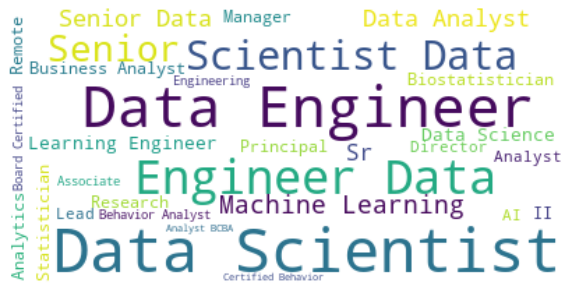

In [35]:
#make a prior analysis to understand the most recurrent job titles

titles = " ".join(df['Job Title'])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 30)
wc.generate(titles)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

#print(wc.words_)

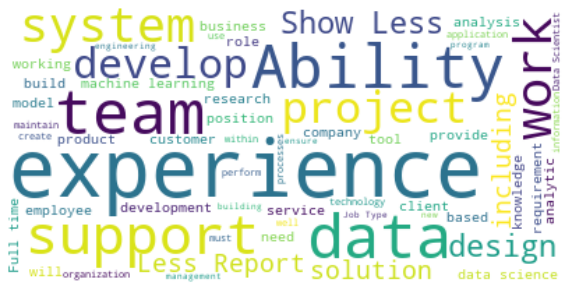

In [36]:
#giving a look also to the job description

words = " ".join(df['Job Description'])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 60)
wc.generate(words)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [37]:
#defining a function to understand which kind of title is the job
def title_simplifier(title):
    title_lower = title.lower()
    if 'data scientist' or 'scientist data' in title_lower:
        return 'data scientist'
    elif 'data engineer' in title_lower:
        return 'data engineer'
    elif 'analyst' or 'data analyst' in title_lower:
        return 'data analyst'
    elif 'machine learning' in title_lower:
        return 'mle'
    elif 'research scientist' in title_lower:
        return 'research scientist'
    elif 'data analyst' in title_lower:
        return 'data analyst'
    elif 'business analyst' in title_lower:
        return 'business analyst'
    elif 'statistician' in title_lower:
        return 'statistician'
    else:
        return None

    


In [38]:
#applying it to the database
df['Job Simplified'] = df['Job Title'].apply(title_simplifier)
df['Job Simplified'].value_counts() 

data scientist    1072
Name: Job Simplified, dtype: int64

In [39]:
#defining a function to understand which kind of title is the job
def seniority(title):
    title_lower = title.lower()
    if 'sr' in title_lower or 'senior' in title_lower or 'lead' in title_lower or 'principal' in title_lower:
        return 'senior'
    elif 'jr' in title_lower or 'jr.' in title_lower or 'entry' in title_lower or 'junior' in title_lower:
        return 'jr'
    elif 'executive' in title_lower or 'vp' in title_lower or 'director' in title_lower:
        return 'executive'
    elif 'manager' in title_lower or 'supervisor' in title_lower:
        return 'manager'
    elif 'associate' in title_lower:
        return 'associate'
    elif 'analyst':
        return 'analyst'
    else:
        return None

In [40]:
#applying it to the database
df['Seniority'] = df['Job Title'].apply(seniority)
df['Seniority'].value_counts() 

analyst      743
senior       249
jr            25
executive     20
associate     18
manager       17
Name: Seniority, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072 entries, 0 to 1388
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        1072 non-null   object 
 1   Salary Estimate  1072 non-null   int64  
 2   Job Description  1072 non-null   object 
 3   Rating           906 non-null    float64
 4   Company Name     1072 non-null   object 
 5   Location         1058 non-null   object 
 6   Size             890 non-null    object 
 7   Industry         830 non-null    object 
 8   Sector           830 non-null    object 
 9   Revenue          586 non-null    object 
 10  Job State        1052 non-null   object 
 11  Job Simplified   1072 non-null   object 
 12  Seniority        1072 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 117.2+ KB


In [42]:
pd.options.display.float_format = '{:.0f}'.format 
df.describe()

#many outliers in the 4th range: we have to restrict it

,Salary Estimate,Rating
count,1072,906
mean,138141492801786,4
std,2497124699429136,1
min,3500,1
25%,88970,4
50%,110915,4
75%,149635,4
max,56804800000000000,5


<h2>Data Cleaning Functions needed</h2>

In [43]:
#defining a function to understand which kind of title is the job
def title_simplifier(title):
    title_lower = title.lower()
    if 'data engineer' in title_lower:
        return 'data engineer'
    elif 'analyst' in title_lower:
        return 'analyst'
    elif 'machine learning' in title_lower:
        return 'mle'
    elif 'research scientist' in title_lower:
        return 'research scientist'
    elif 'data analyst' in title_lower:
        return 'data analyst'
    elif 'business analyst' in title_lower:
        return 'business analyst'
    elif 'statistician' in title_lower:
        return 'statistician'
    elif 'data architect' in title_lower:
        return 'data architect'
    elif 'data modeler' in title_lower:
        return 'data modeler'
    elif 'database administrator' in title_lower:
        return 'database administrator'
    if 'data scientist' or 'scientist data' in title_lower:
        return 'data scientist'
    else:
        return None

In [44]:
#defining a function to understand which kind of title is the job
def seniority(title):
    title_lower = title.lower()
    if 'sr' in title_lower or 'senior' in title_lower or 'lead' in title_lower or 'principal' in title_lower:
        return 'senior'
    elif 'jr' in title_lower or 'jr.' in title_lower or 'entry' in title_lower or 'junior' in title_lower:
        return 'jr'
    elif 'executive' in title_lower or 'vp' in title_lower or 'director' in title_lower:
        return 'executive'
    elif 'manager' in title_lower or 'supervisor' in title_lower:
        return 'manager'
    elif 'associate' in title_lower:
        return 'associate'
    else:
        return None

In [201]:
# Disable SettingWithCopyWarning

#first data cleaning function: basic one

pd.options.mode.chained_assignment = None
import re
def clean_data(df, do=True):
    
    #remove duplicates
    #print(f"There are {df.duplicated().sum()} duplicates")
    df.drop_duplicates(inplace=True)
    
    #remove unnecessary columns
    df.drop(['Type of ownership', 'Founded'], axis=1, inplace=True)
    
    #remove all rows that have a missing estimated salary. We need labeled examples in order to build our model!

    # We first Count the number of rows with -1 as salary estimate (which means it is missing)
    #count = df[df['Salary Estimate'] == '-1'].shape[0]
    #print(f'There are {count} rows with a missing salary estimate')

    #remove those rows
    df = df[df['Salary Estimate'] != '-1']
    
    if do: 
        # Identify rows with hourly salary values
        hourly_mask = df['Salary Estimate'].str.contains('/hr')

        # Convert hourly salary values to yearly salary values
        df.loc[hourly_mask, 'Salary Estimate'] = df.loc[hourly_mask, 'Salary Estimate'].apply(lambda x: str(float(x[1:x.index('/')].replace(',', '')) * 2080) + ' /yr (est.)')


        # Remove any non-numeric characters and convert to numeric
        df.loc[:, 'Salary Estimate'] = df['Salary Estimate'].apply(lambda x: re.sub(r'[^0-9]', '', x))

        df.loc[:,'Salary Estimate'] = pd.to_numeric(df['Salary Estimate'])
        
        
        # Identify any outliers based on the box plot and remove them using boolean indexing
        df = df[df['Salary Estimate'] > 15080]  #They must all be positive
        df = df[df['Salary Estimate'] < 1000000]  #Values under 2M$ seem legit salaries
        
        
    #We now have in our salary estimate column yearly salaries expressed as integers
    
    #cleaning a little bit the job description
    df.loc[:,'Job Description'] = df['Job Description'].apply(lambda x: x.replace('\n', ' '))
    
    #adding a column for the state
    df.loc[:,'Job State'] = df['Location'].apply(lambda x: x.strip()[-2:] if not isinstance(x, float) else None)
    
    #make some cleaning on it
    df.loc[df['Job State'] == 'ia', 'Job State'] = 'CA' #changing California to CA
    df.loc[df['Job State'] == 'ts', 'Job State'] = 'MA' #changing Massacchussets to MA
    df.loc[df['Job State'] == 'is', 'Job State'] = 'IL' #changing Illinois to IL
    df.loc[df['Job State'] == 'an', 'Job State'] = 'NY'  #changing Manatthan to NY
    df.loc[df['Job State'].isin(['te', 'nd']), 'Job State'] = 'Remote' #Remoe for England also
    df.loc[df['Job State'] == 'as', 'Job State'] = 'TX'
    df.loc[df['Job State'] == 'es', 'Job State'] = None #United States
    df.loc[df['Job State'] == 'on', 'Job State'] = 'OR' #Oregon
    df.loc[df['Job State'] == 'ah', 'Job State'] = 'UT' #Utah
    df.loc[df['Job State'] == 'co', 'Job State'] = 'NM' #New Mexico
    df.loc[df['Job State'] == 'do', 'Job State'] = 'CO' #Colorado
    df.loc[df['Job State'] == 'na', 'Job State'] = 'NC' #North Carolina
    df.loc[df['Job State'] == 'ma', 'Job State'] = 'AL' #Alabama
    
    #Seting Size NaN
    df.loc[df['Size'] == '-1', 'Size'] = np.nan
    
    #reformatting properly the company name
    #df['Company Name'] = df['Company Name'].apply(lambda x: x[:-4] if '\n' in x else x)
    df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\r', '').strip()[:-4] if '\n' in x else x.replace('\r', '').strip())

    #reformatting and cleaning size
    df.loc[df['Size'].isin(['1 to 50 Employees', '1 to 50 employees']), 'Size'] = '1 - 50'
    df.loc[df['Size'].isin(['51 to 200 Employees', '51 to 200 employees']), 'Size'] = '51 - 200'
    df.loc[df['Size'].isin(['201 to 500 Employees', '201 to 500 employees']), 'Size'] = '201 - 500'
    df.loc[df['Size'].isin(['501 to 1000 Employees', '501 to 1000 employees']), 'Size'] = '501 - 1000'
    df.loc[df['Size'].isin(['1001 to 5000 Employees', '1001 to 5000 employees']), 'Size'] = '1001 - 5000'
    df.loc[df['Size'].isin(['5001 to 10000 Employees', '5001 to 10000 employees']), 'Size'] = '5001 - 10000'
    df.loc[df['Size'].isin(['10000+ Employees', '10000+ employees']), 'Size'] = '10000+'


    df.loc[df['Size'] == '-1', 'Size'] = np.nan
    df.loc[df['Size'] == 'Unknown', 'Size'] = np.nan
    #reformatting and cleaning revenues (million $)
    df.loc[df['Revenue'] == 'Less than $1 million (USD)', 'Revenue'] = '0 - 1'
    df.loc[df['Revenue'] == '$1 to $5 million (USD)', 'Revenue'] = '1 - 5'
    df.loc[df['Revenue'].isin(['$5 to $25 million (USD)', '$5 to $10 million (USD)', '$10 to $25 million (USD)']), 'Revenue'] = '5 - 25'
    df.loc[df['Revenue'].isin(['$25 to $100 million (USD)', '$25 to $50 million (USD)', '$50 to $100 million (USD)']), 'Revenue'] = '25 - 100'
    df.loc[df['Revenue'] == '$100 to $500 million (USD)', 'Revenue'] = '100 - 500'
    df.loc[df['Revenue'] == '$500 million to $1 billion (USD)', 'Revenue'] = '500 - 1000'
    df.loc[df['Revenue'].isin(['$1 to $2 billion (USD)', '$2 to $5 billion (USD)', '$1 to $5 billion (USD)']), 'Revenue'] = '1000 - 5000'
    df.loc[df['Revenue'] == '$5 to $10 billion (USD)', 'Revenue'] = '5000 - 10000'
    df.loc[df['Revenue'] == '$10+ billion (USD)', 'Revenue'] = '10000+'
    df.loc[df['Revenue'] == '-1', 'Revenue'] = np.nan
    df.loc[df['Revenue'] == 'Unknown / Non-Applicable', 'Revenue'] = np.nan
    
    #$1 to $2 billion (USD)
    
    #cleaning Industry and Sector
    
    df.loc[df['Industry'] == '-1', 'Industry'] = None
    
    df.loc[df['Sector'] == '-1', 'Sector'] = None
    
    #adding Job Simplified column
    df.loc[:,'Job Simplified'] = (df['Job Title']).apply(title_simplifier)
    
    
    
    #adding Seniority column
    df.loc[:,'Seniority'] = (df['Job Title']).apply(seniority)
    

    if do:
        #remove jr data scientists with high salary
        df = df.loc[~((df['Seniority']=='jr') & (df['Salary Estimate']>200000))]

        #Assumption: if a company get 1 million revenue cannot pay an employee more than 200000 $
        df = df[~((df['Revenue'] == '0 - 1') & (df['Salary Estimate'] > 200000))]

    return df


In [202]:
pd.set_option('display.max_columns', None)



In [204]:
def clean_data2(df2):
    #remove nan
    df2 = df2.dropna()
    #take the mean of the salary
    df2['Salary Estimate'] = 0
    df2['Salary Estimate'] = df2['avg_salary']*1000
    df2.loc[:,'Salary Estimate'] = pd.to_numeric(df2['Salary Estimate'])
    #remove unnecessary columns
    df2 = df2.iloc[:, np.r_[1,2,3,4,5,6,8,9,10,11,12,13]]
    df2 = df2[df2['Salary Estimate'] > 15080]  #They must all be positive
    df2 = df2[df2['Salary Estimate'] < 1000000]  #Values under 2M$ seem legit salaries
    df2 = clean_data(df2, False)
    return df2

df2 = pd.read_csv('Ken_lee_eda_data.csv')
df2 = clean_data2(df2)
df = pd.read_csv('glassdoor_ds_job_salary.csv')
df=clean_data(df)

In [205]:
df2['Size'].value_counts()

1001 - 5000     93
501 - 1000      80
10000+          80
201 - 500       77
51 - 200        61
5001 - 10000    45
1 - 50          24
Name: Size, dtype: int64

In [206]:
df2['Revenue'].value_counts()

10000+          70
1000 - 5000     64
100 - 500       57
25 - 100        52
500 - 1000      34
5 - 25          34
5000 - 10000    12
1 - 5            5
0 - 1            4
Name: Revenue, dtype: int64

In [207]:
df['Revenue'].value_counts()

10000+          130
1000 - 5000      90
100 - 500        73
5 - 25           67
25 - 100         58
5000 - 10000     39
500 - 1000       31
1 - 5            31
0 - 1            11
Name: Revenue, dtype: int64

In [208]:
df = pd.concat([df, df2], ignore_index=True)
df.describe()

,Salary Estimate,Rating
count,1417,1417
mean,124048,3
std,111820,2
min,15500,-1
25%,83000,3
50%,103000,4
75%,127300,4
max,988000,5


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        1417 non-null   object 
 1   Salary Estimate  1417 non-null   float64
 2   Job Description  1417 non-null   object 
 3   Rating           1417 non-null   float64
 4   Company Name     1417 non-null   object 
 5   Location         1405 non-null   object 
 6   Size             1257 non-null   object 
 7   Industry         1221 non-null   object 
 8   Sector           1221 non-null   object 
 9   Revenue          862 non-null    object 
 10  Job State        1400 non-null   object 
 11  Job Simplified   1417 non-null   object 
 12  Seniority        461 non-null    object 
dtypes: float64(2), object(11)
memory usage: 144.0+ KB


In [210]:
pd.options.display.float_format = '{:.0f}'.format 
df.describe()



,Salary Estimate,Rating
count,1417,1417
mean,124048,3
std,111820,2
min,15500,-1
25%,83000,3
50%,103000,4
75%,127300,4
max,988000,5


In [211]:
value_counts = df['Salary Estimate'].value_counts()

# Sorting value counts by the index
value_counts_sorted = value_counts.sort_index()



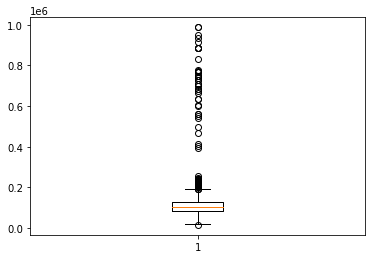

In [212]:
import matplotlib.pyplot as plt

# Create a box plot of the salary_estimate column


#There's a value which is way too higher than the others,
#Let's remove it

# Identify any outliers based on the box plot and remove them using boolean indexing
df = df[df['Salary Estimate'] > 15080]
df = df[df['Salary Estimate'] < 1000000]

plt.boxplot(df['Salary Estimate']);

#Values under 2M$ seem legit salaries

EDA

In [213]:
# get summary statistics for numerical columns
print(df.describe())

       Salary Estimate  Rating
count             1417    1417
mean            124048       3
std             111820       2
min              15500      -1
25%              83000       3
50%             103000       4
75%             127300       4
max             988000       5


In [214]:
# check for missing values
print(df.isnull().sum())

#If we have some columns missing too many values, then, they might be not good to build a model

#Ex. seniority can be removed, same for revenue

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location            12
Size               160
Industry           196
Sector             196
Revenue            555
Job State           17
Job Simplified       0
Seniority          956
dtype: int64


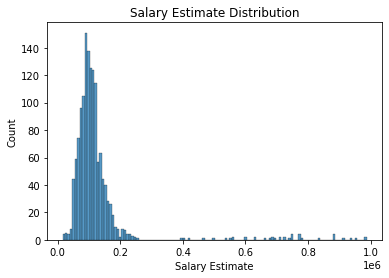

In [215]:
# plot a histogram of the Salary Estimate column
sns.histplot(data=df, x='Salary Estimate')
plt.title('Salary Estimate Distribution')
plt.show()

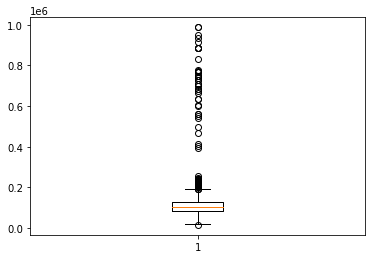

In [216]:
#Plot a boxplot of the Salary Estimate Column

plt.boxplot(df['Salary Estimate']);

Analyzing numerical variables

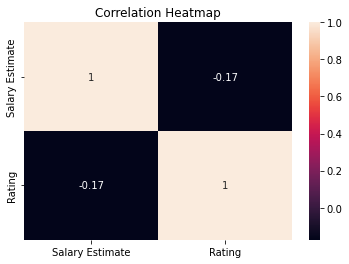

In [217]:
# plot a heatmap of correlations between numerical columns
numerical_cols = ['Salary Estimate', 'Rating']
sns.heatmap(data=df[numerical_cols].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

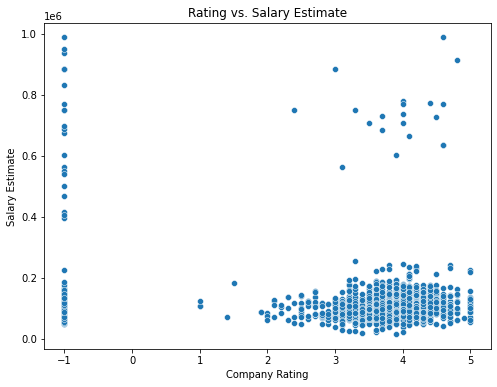

In [218]:
# plot a scatterplot of Salary Estimate vs. Rating

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Rating', y='Salary Estimate')
plt.xlabel('Company Rating')
plt.ylabel('Salary Estimate')
plt.title('Rating vs. Salary Estimate')
plt.show()


In [219]:
#From the two graphs above, there seems to be very small correlation between rating and salary.
#Rating might not be an interesting variable to use in our model then

In [220]:
df['Job Simplified'].value_counts()

data scientist        787
data engineer         258
analyst               218
mle                    81
statistician           49
research scientist     17
data architect          4
data modeler            3
Name: Job Simplified, dtype: int64

In [221]:
df['Seniority'].value_counts()

senior       349
associate     31
executive     30
manager       28
jr            23
Name: Seniority, dtype: int64

In [222]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Job State', 'Job Simplified', 'Seniority'],
      dtype='object')

In [223]:
df['Job State'].value_counts()

CA        188
NY        121
TX        111
MA        109
VA         96
IL         70
Remote     61
MD         56
PA         47
NJ         46
WA         42
NC         37
FL         33
CO         31
OH         30
DC         27
CT         24
GA         20
MN         19
IN         19
UT         18
WI         17
MI         15
TN         15
AL         14
AZ         14
OR         12
MO         10
IA         10
SC          9
DE          9
NE          8
OK          7
LA          7
KY          7
ID          6
KS          5
NM          5
NH          4
RI          4
MS          3
ME          3
AR          3
NV          2
HI          2
WV          2
VT          1
MT          1
Name: Job State, dtype: int64

In [224]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Job State', 'Job Simplified', 'Seniority'],
      dtype='object')

In [225]:
df['Company Name']

0       RightFit Talent Brokers, LLC
1         Signal Systems Corporation
2                          WALGREENS
3                innoVet Health, LLC
4                           Vanguard
                    ...             
1412              Medidata Solutions
1413                 DatamanUSA, LLC
1414                         23andMe
1415                CK-12 Foundation
1416                       Fivestars
Name: Company Name, Length: 1417, dtype: object

In [226]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Industry', 'Sector', 'Revenue',
       'Job State', 'Job Simplified', 'Seniority'],
      dtype='object')

Analyzing Categorical Variables

Let's first make a barplot for every categorical variable.
It's better to make a horizontal barplot because we have too many values for each category and it would be hard to visualize them

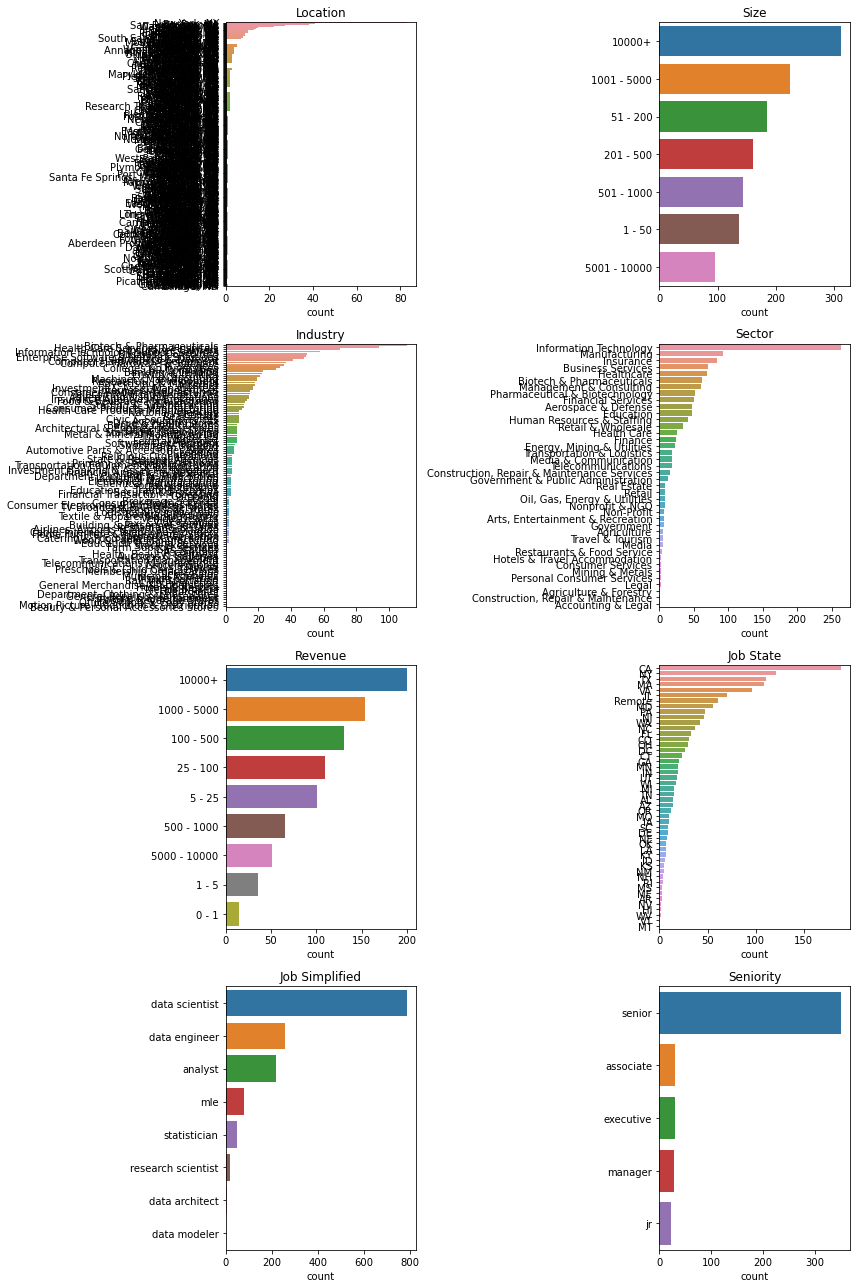

In [227]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))

# Loop through each categorical variable and plot the countplot
for i, categorical in enumerate(categorical):
    
    

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.barplot(y=categorical, x='count', data=df[categorical].value_counts().reset_index().rename(columns={categorical: 'count', 'index': categorical}), ax=ax)
    ax.set_title(categorical)
    ax.set(ylabel='')
    
fig.tight_layout()
plt.show()

We notice that there are too many values for some categorical values, so 
it would be better to just display the top 20

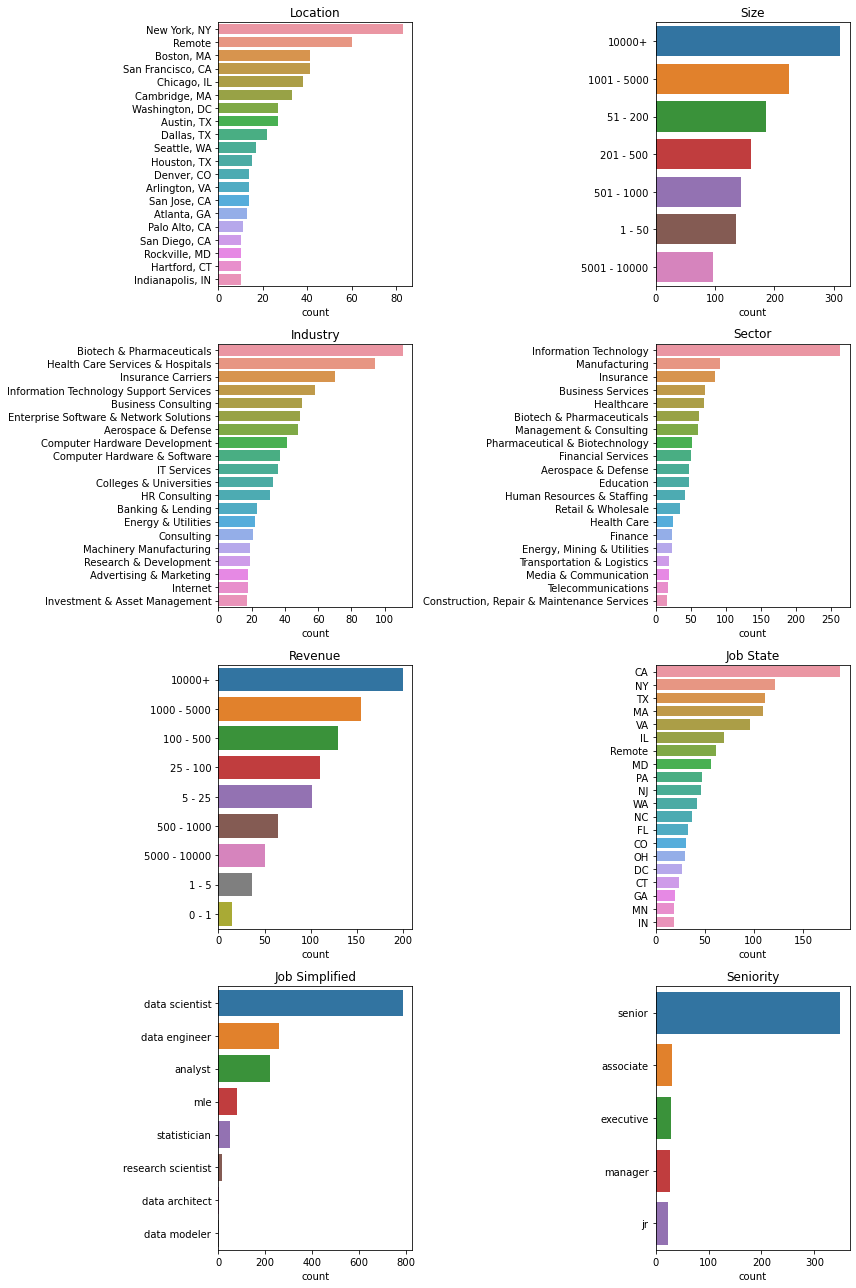

In [228]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 18))

# Loop through each categorical variable and plot the countplot
for i, categorical in enumerate(categorical):
    
    #sns.countplot(x=categorical, data=df,order=df[categorical].value_counts().iloc[:10].index, ax=ax)
    
    #ax.set_title(categorical)

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.barplot(y=categorical, x='count', data=df[categorical].value_counts().iloc[:20].reset_index().rename(columns={categorical: 'count', 'index': categorical}), ax=ax)
    ax.set_title(categorical)
    ax.set(ylabel='')
    
fig.tight_layout()
plt.show()

Let's look for some correlation between each categorical variable and the salary using boxplots where salaries are grouped by the values of each categorical variable

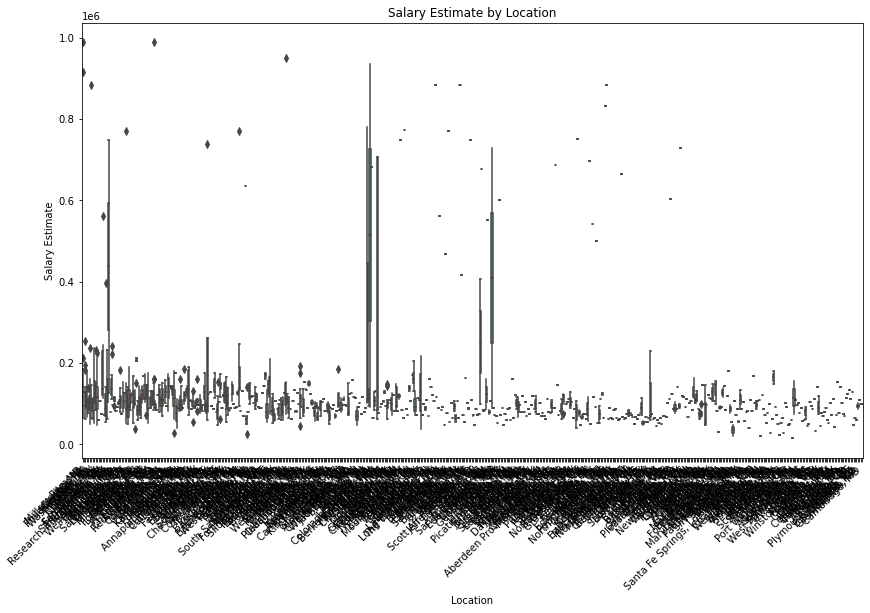

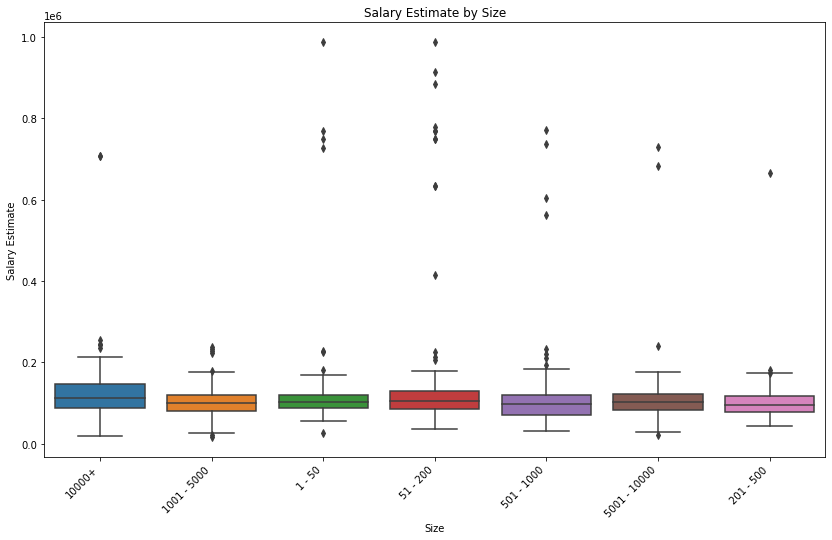

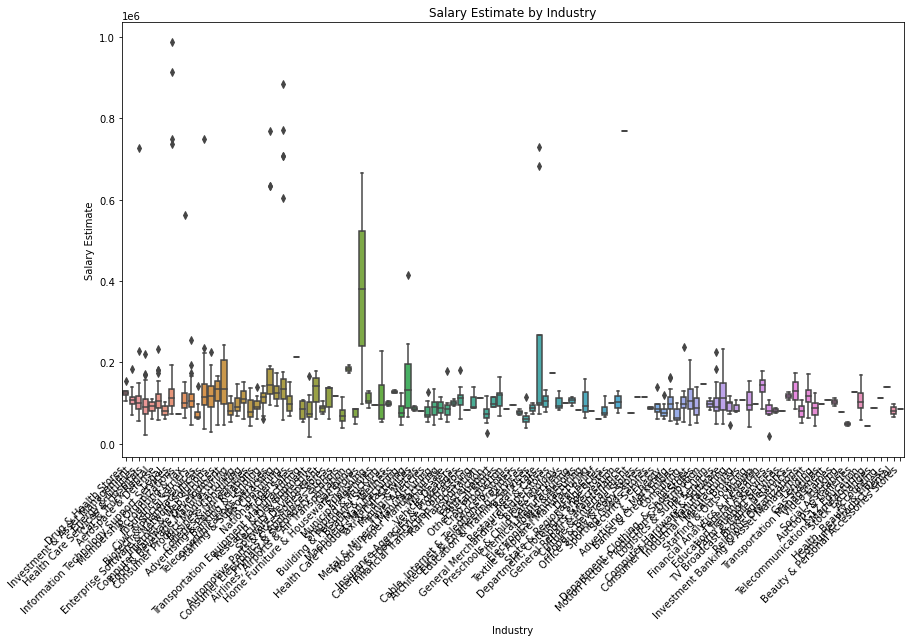

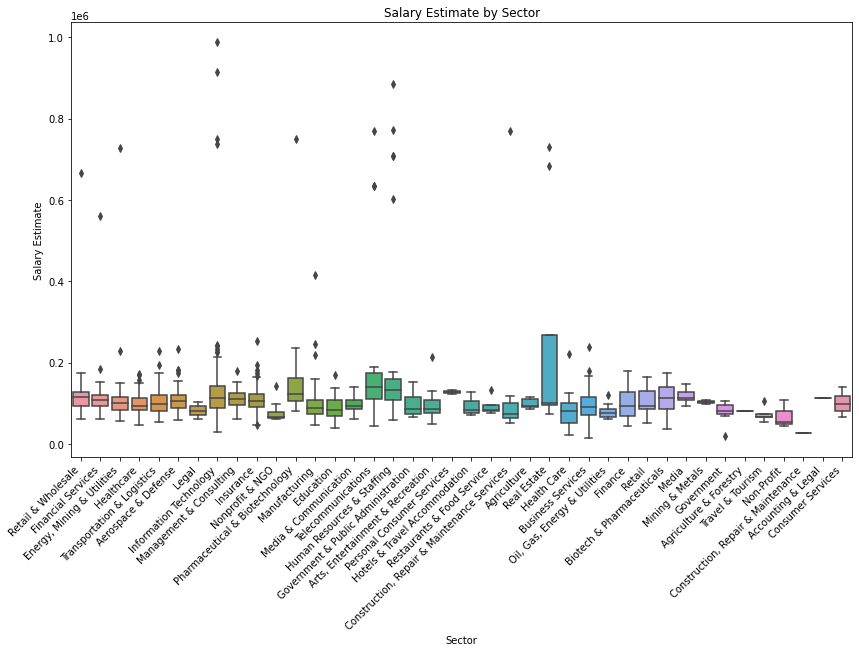

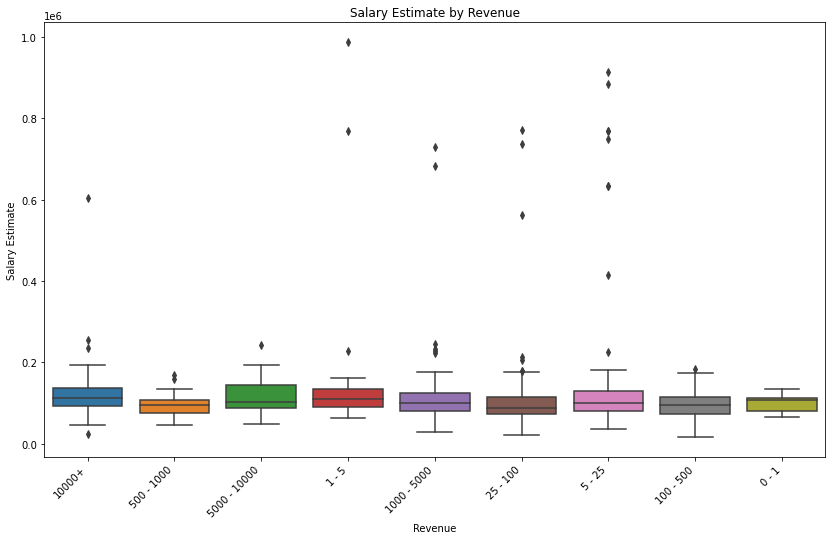

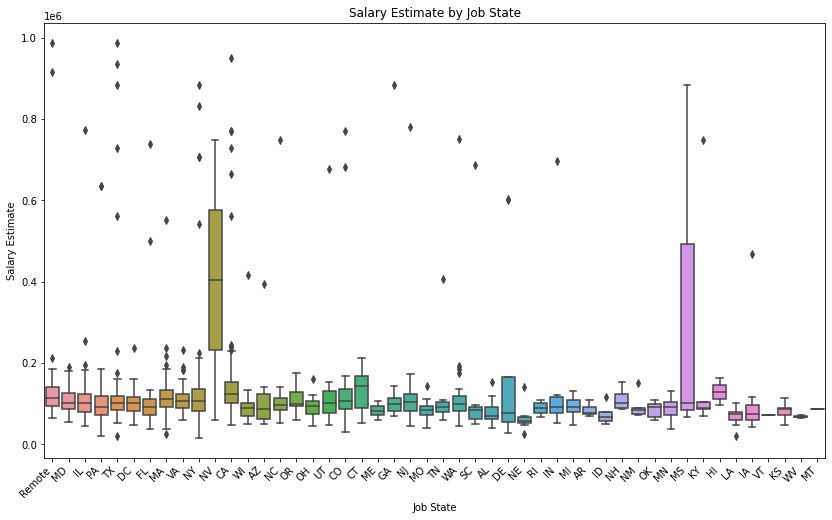

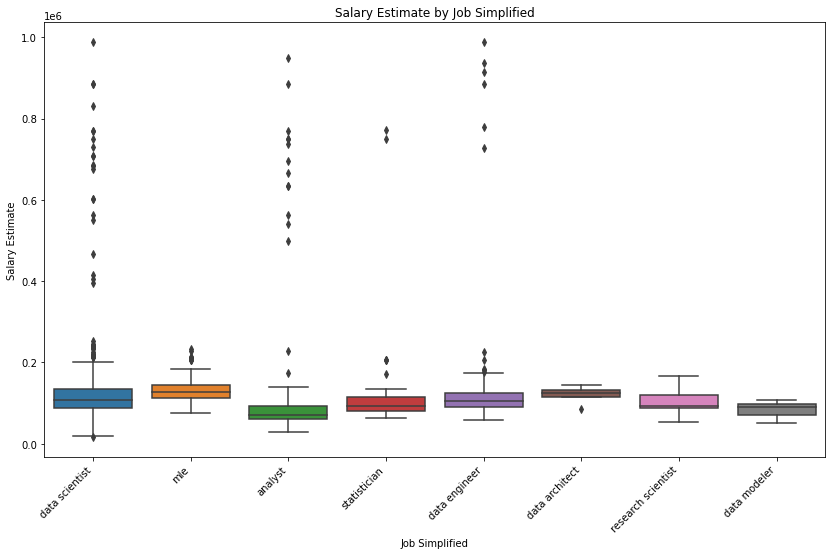

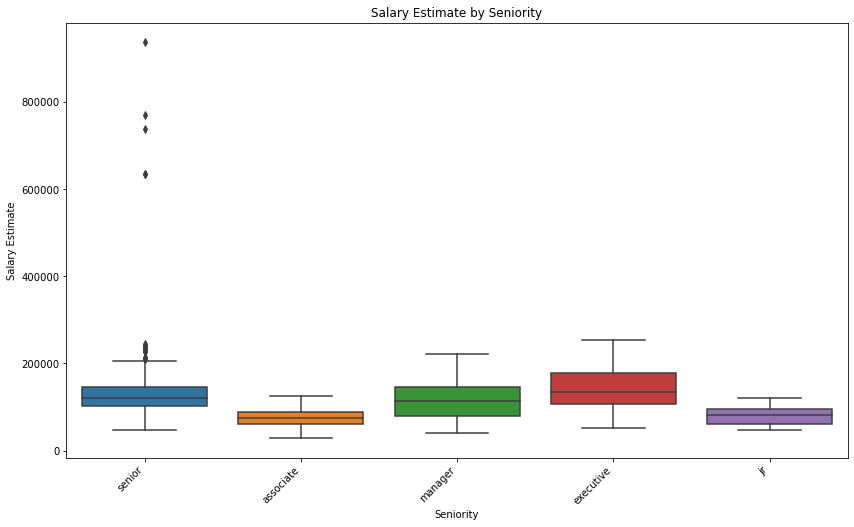

In [229]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']

for category in categorical:
    plt.figure(figsize=(14, 8)) 
    sns.boxplot(data=df, x=category, y='Salary Estimate')
    plt.title(f'Salary Estimate by {category}')
    plt.xticks(rotation=45, ha='right') # rotate and align the x-axis labels
    plt.show()
    

In [230]:
df['Job Simplified'].value_counts()

data scientist        787
data engineer         258
analyst               218
mle                    81
statistician           49
research scientist     17
data architect          4
data modeler            3
Name: Job Simplified, dtype: int64

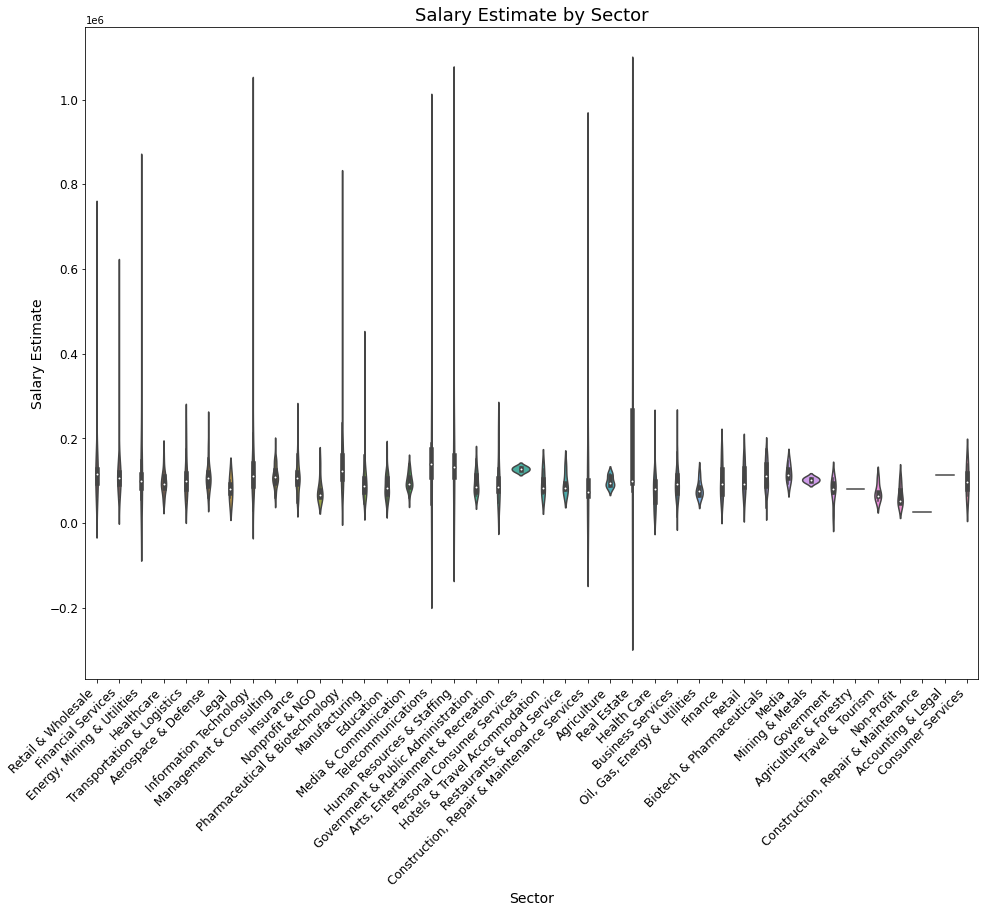

In [231]:
#Let's look at some correlation between sector and salary
# plot a violin plot of Salary Estimate by Sector
plt.figure(figsize=(16, 12))  
sns.violinplot(data=df, x='Sector', y='Salary Estimate')
plt.xticks(rotation=45, ha='right')
plt.title('Salary Estimate by Sector', fontsize=18) 
plt.xlabel('Sector', fontsize=14)  
plt.ylabel('Salary Estimate', fontsize=14)  
plt.tick_params(labelsize=12)  
plt.show()

A chi-squared test to determine the independence between categorical variables

In [232]:
categorical=['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State','Job Simplified', 'Seniority']


for i in range(len(categorical)):
    for j in range(i+1, len(categorical)):
        cross_tab = pd.crosstab(df[categorical[i]], df[categorical[j]])
        chi2, p, dof, expected = chi2_contingency(cross_tab)
        print(f'Chi-Squared Test p-value for {categorical[i]} and {categorical[j]}:', p)

Chi-Squared Test p-value for Location and Size: 2.176554627997872e-19
Chi-Squared Test p-value for Location and Industry: 0.0
Chi-Squared Test p-value for Location and Sector: 6.482685105863709e-195
Chi-Squared Test p-value for Location and Revenue: 9.615380343047481e-14
Chi-Squared Test p-value for Location and Job State: 0.0
Chi-Squared Test p-value for Location and Job Simplified: 0.999859776784459
Chi-Squared Test p-value for Location and Seniority: 0.02856567354578356
Chi-Squared Test p-value for Size and Industry: 2.94376230087731e-38
Chi-Squared Test p-value for Size and Sector: 1.383601905936732e-30
Chi-Squared Test p-value for Size and Revenue: 9.696039633801181e-296
Chi-Squared Test p-value for Size and Job State: 2.600120224374054e-07
Chi-Squared Test p-value for Size and Job Simplified: 0.0029381882424078945
Chi-Squared Test p-value for Size and Seniority: 0.010800810899430907
Chi-Squared Test p-value for Industry and Sector: 0.0
Chi-Squared Test p-value for Industry and Re

In [233]:
alpha = 0.05
for i, var1 in enumerate(categorical[:-1]):
    for var2 in categorical[i+1:]:
        cross = pd.crosstab(df[var1], df[var2])
        chi2, p, dof, expected = chi2_contingency(cross)
        if p < alpha:
            print(f"{var1} and {var2} are significantly associated with p-value {p:.3f}") #meaning they are somehow dependent

Location and Size are significantly associated with p-value 0.000
Location and Industry are significantly associated with p-value 0.000
Location and Sector are significantly associated with p-value 0.000
Location and Revenue are significantly associated with p-value 0.000
Location and Job State are significantly associated with p-value 0.000
Location and Seniority are significantly associated with p-value 0.029
Size and Industry are significantly associated with p-value 0.000
Size and Sector are significantly associated with p-value 0.000
Size and Revenue are significantly associated with p-value 0.000
Size and Job State are significantly associated with p-value 0.000
Size and Job Simplified are significantly associated with p-value 0.003
Size and Seniority are significantly associated with p-value 0.011
Industry and Sector are significantly associated with p-value 0.000
Industry and Revenue are significantly associated with p-value 0.000
Industry and Job State are significantly associ

<h2 style=color:green>Correct Version</h2>

In [234]:
# Select the columns of interest
cols_of_interest = ['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State', 'Job Simplified', 'Seniority', 'Salary Estimate']
data = df[cols_of_interest]


for col in ['Location', 'Size', 'Industry', 'Sector', 'Revenue', 'Job State', 'Job Simplified', 'Seniority']:
    cont_table = pd.crosstab(data[col], data['Salary Estimate'])
    stat, p, dof, expected = chi2_contingency(cont_table)
    print(f"Chi-squared test for {col}:")
    print(f"p-value = {p}")
    if p < 0.05:
        print(f"There is a significant association between {col} and the Salary Estimate.\n")
    else:
        print(f"There is no significant association between {col} and the Salary Estimate.\n")

Chi-squared test for Location:
p-value = 2.120452413786018e-254
There is a significant association between Location and the Salary Estimate.

Chi-squared test for Size:
p-value = 0.11997475653072848
There is no significant association between Size and the Salary Estimate.

Chi-squared test for Industry:
p-value = 0.7130493267975404
There is no significant association between Industry and the Salary Estimate.

Chi-squared test for Sector:
p-value = 0.26796563353550307
There is no significant association between Sector and the Salary Estimate.

Chi-squared test for Revenue:
p-value = 0.20815761906809063
There is no significant association between Revenue and the Salary Estimate.

Chi-squared test for Job State:
p-value = 2.716694807028076e-22
There is a significant association between Job State and the Salary Estimate.

Chi-squared test for Job Simplified:
p-value = 0.3713099703625816
There is no significant association between Job Simplified and the Salary Estimate.

Chi-squared test fo

In [235]:
df.groupby('Job State')['Salary Estimate'].mean().sort_values(ascending=False).to_frame()

,Salary Estimate
Job State,
NV,404400
MS,351309
DE,193911
KY,184269
CA,146582
CO,146015
Remote,144980
SC,142365
GA,138132


In [236]:
df[df['Job State']=='nd']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Job State,Job Simplified,Seniority


In [237]:
#define a function which do the graphs, given a name, an order and a width of the figure

def make_grouped_and_count_ordered_graph(name, order, width=10):
    
        # group the data by Seniority and compute the mean of Salary Estimate for each group
    grouped_df = df.groupby(name)['Salary Estimate'].mean()

    count_df = df.groupby(name)[name].size()


    # map the seniority levels to their corresponding numerical values using a lambda function
    grouped_df.index = grouped_df.index.map(lambda x: order[x])
    count_df.index = count_df.index.map(lambda x: order[x])

    fig, ax1 = plt.subplots(figsize=(width, 6))

    # Plot the mean salary on the first subplot
    ax1.scatter(grouped_df.index, grouped_df.values, color='blue')
    ax1.set_xlabel(name)
    ax1.set_ylabel('Mean Salary Estimate', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x')

    # Create a second axis with the same x-axis as the first subplot
    ax2 = ax1.twinx()

    # Plot the count of entries on the second subplot
    bar_width = 0.5
    ax2.bar(count_df.index, count_df.values, width=bar_width, color='orange', alpha=0.5)
    ax2.set_ylabel('Count of Entries', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.tick_params(axis='x', labelrotation=90)

    # Reverse the mapping and use the original seniority level names as the tick labels
    tick_labels = [level for level, value in sorted(order.items(), key=lambda x: x[1]) if value in grouped_df.index]
    ax1.set_xticks(sorted(grouped_df.index))
    ax1.set_xticklabels(tick_labels)

    #write the value in each point of the scatterplo
    for i, value in enumerate(grouped_df.values):
        ax1.annotate("{:.2f}".format(value), (grouped_df.index[i], value))

    # Adjust the x-axis tick labels and spacing
    plt.subplots_adjust(bottom=0.2)

    # Show the plot
    plt.show()


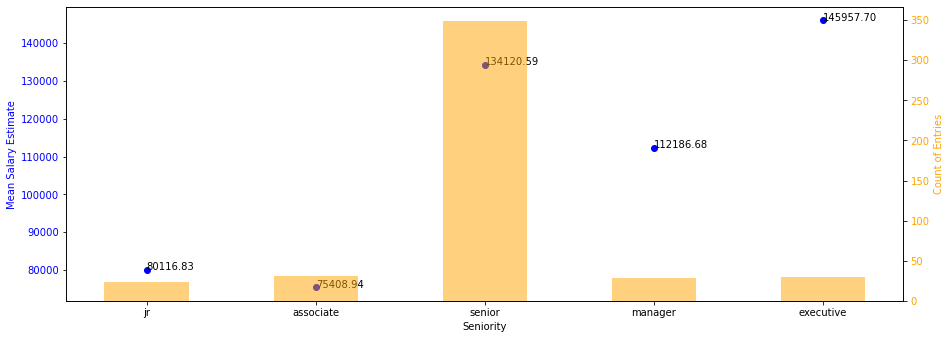

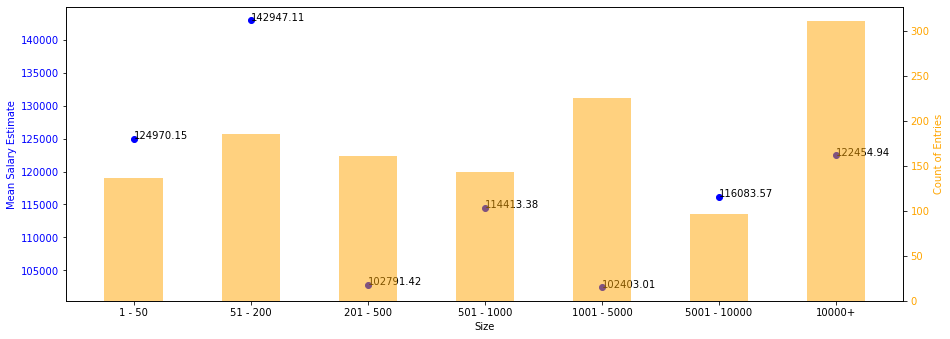

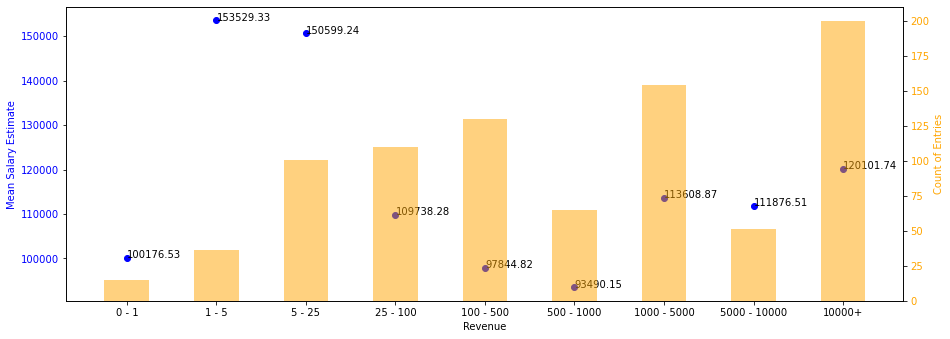

In [238]:
seniority_order = {'jr': 0, 'associate': 1, 'senior': 2, 'manager': 3, 'executive': 4}
size_order = {'1 - 50': 0, '51 - 200': 1, '201 - 500': 2, '501 - 1000': 3, '1001 - 5000': 4, '5001 - 10000': 5, '10000+': 6}
revenue_order = {'0 - 1': 0, '1 - 5': 1, '5 - 25': 2, '25 - 100': 3, '100 - 500': 4, '500 - 1000': 5, '1000 - 5000': 6, '5000 - 10000': 7, '10000+':8}
make_grouped_and_count_ordered_graph('Seniority', seniority_order,15)
make_grouped_and_count_ordered_graph('Size', size_order,15)
make_grouped_and_count_ordered_graph('Revenue', revenue_order, 15)

In [239]:
#let's give a look inside salaries in companies with 0 - 1 millions revenues
df[df['Revenue']=='0 - 1']

#some of them are exagerated: if a company get 1 million revenue cannot pay an employee more than 200000 $
#we implement this in the data cleaning function

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Industry,Sector,Revenue,Job State,Job Simplified,Seniority
34,Machine Learning Engineer,100000,Job Title : AI Engineer / Architect with Exper...,4,Stemuli Studios Inc.,Remote,1 - 50,Business Consulting,Management & Consulting,0 - 1,Remote,mle,None
69,"Staff Software Engineer, Machine Learning",130000,We are currently recruiting for a Staff Softwa...,-1,Oculus Search Partners LLC,"Carlsbad, CA",1 - 50,None,None,0 - 1,CA,mle,None
156,Data Scientist,108390,MARKETview Education Partners is seeking brigh...,4,MARKETview,"Richmond, VA",1 - 50,None,None,0 - 1,VA,data scientist,None
157,Data Scientist - Computer Vision,119012,Job Description Title: Data Scientist/Compute...,-1,Chabez Tech,"Santa Clara, CA",1 - 50,None,None,0 - 1,CA,data scientist,None
731,Data Scientist - Mid,110527,Contingent upon contract award JOB DESCRIPTION...,4,"Broadleaf, Inc","Manassas, VA",1 - 50,None,None,0 - 1,VA,data scientist,None
747,Board Certified Behavior Analyst-Louisville,70000,We are growing in Louisville! We are currently...,4,Adapt For Life,"Louisville, KY",1 - 50,None,None,0 - 1,KY,analyst,None
749,Board Certified Behavior Analyst (BCBA),72500,"Help, Hope, Solutions: BCBA Job Type: Full-tim...",3,"Help, Hope, Solutions LLC","Plano, TX",1 - 50,None,None,0 - 1,TX,analyst,None
770,Insurance Business Analyst,65000,"About Us: CSG Actuarial, an Integrity Marketin...",4,"CSG Actuarial, LLC","Omaha, NE",1 - 50,None,None,0 - 1,NE,analyst,None
828,ERP Business Analyst - IT,71219,"Department: Info Tech Srvcs Pay: $71,219.20 an...",3,Sedgwick County,"Wichita, KS",1001 - 5000,State & Regional Agencies,Government & Public Administration,0 - 1,KS,analyst,None
940,Machine Learning Engineer L-1,86500,"Job Description: Develop high-quality, maintai...",3,Lauretta AI LLC,"Austin, TX",1 - 50,Information Technology Support Services,Information Technology,0 - 1,TX,mle,None


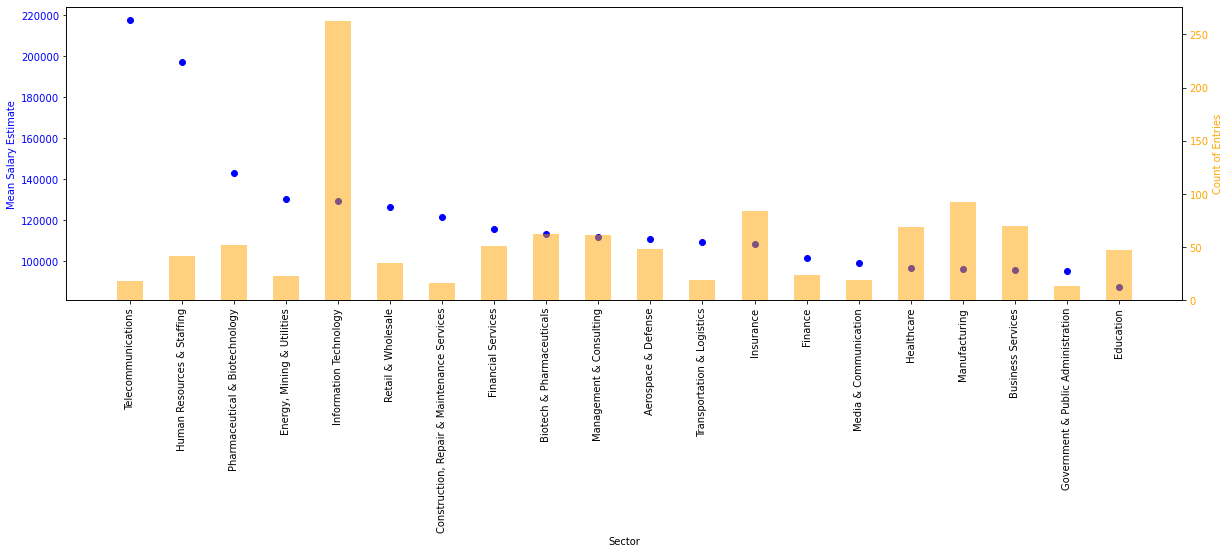

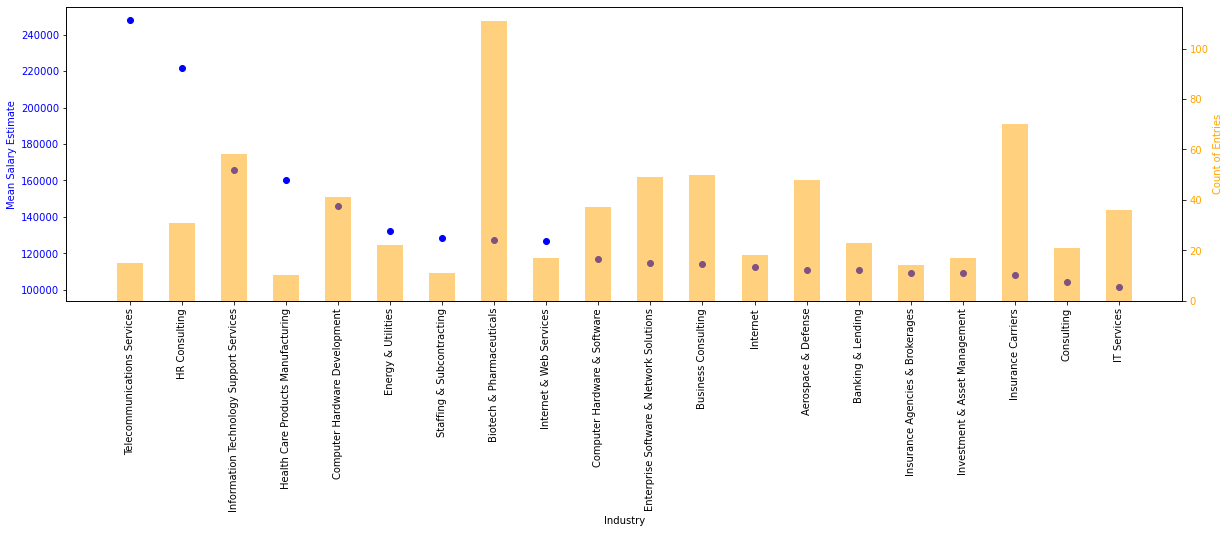

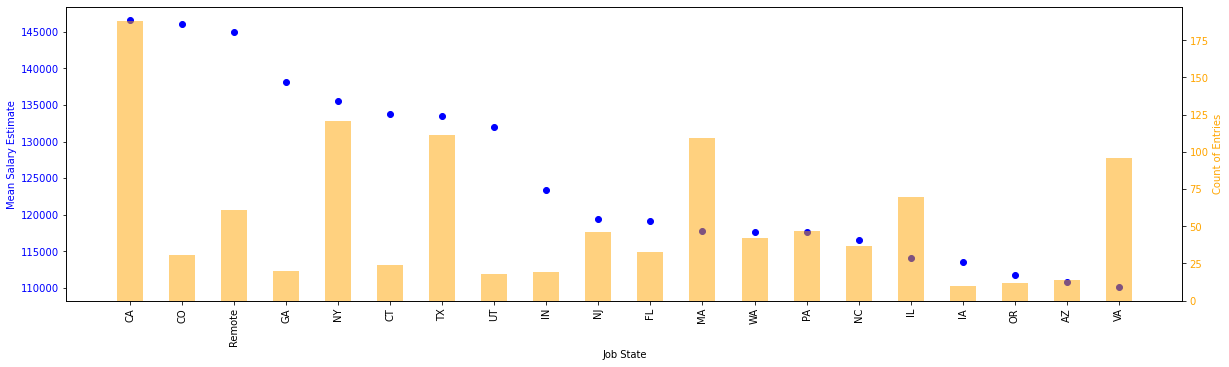

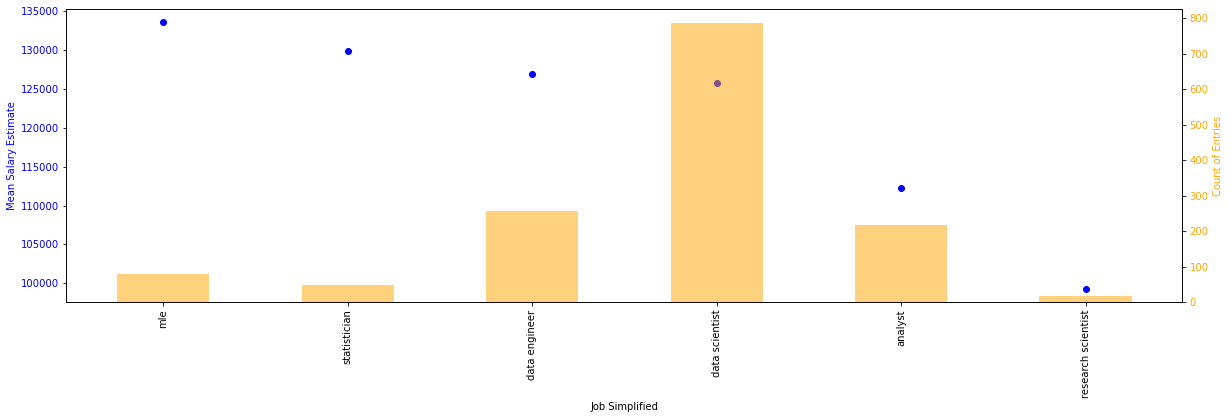

In [240]:
names = ['Sector','Industry','Job State', 'Job Simplified']
for name in names:
    #remove the rows whose size is less than 10: we need at least 10 values to be reliable!
    grouped_df = df.groupby(name)['Salary Estimate'].mean()
    count_df = df.groupby(name)[name].size()
    # Filter out groups with fewer than 10 entries
    count_df = count_df[count_df >= 10]
    grouped_df = grouped_df.loc[count_df.index]

    # Sort the table in descending order by salary
    grouped_df = grouped_df.sort_values(ascending=False)[:20]
    count_df = count_df.loc[grouped_df.index]

    # Create a figure with two subplots sharing the same x-axis
    fig, ax1 = plt.subplots(figsize=(20, 6))

    # Plot the mean salary on the first subplot
    ax1.scatter(grouped_df.index, grouped_df.values, color='blue')
    ax1.set_xlabel(name)
    ax1.set_ylabel('Mean Salary Estimate', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.tick_params(axis='x', labelrotation=90)

    # Create a second axis with the same x-axis as the first subplot
    ax2 = ax1.twinx()

    # Plot the count of entries on the second subplot
    bar_width = 0.5
    ax2.bar(count_df.index, count_df.values, width=bar_width, color='orange', alpha=0.5)
    ax2.set_ylabel('Count of Entries', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.tick_params(axis='x', labelrotation=90)
    # Adjust the x-axis tick labels and spacing
    plt.xticks(rotation=90, ha='center')
    plt.subplots_adjust(bottom=0.2)
    

    # Show the plot
    plt.show()